<a href="https://colab.research.google.com/github/MasayukiMotoori/SEGJ_2025/blob/main/Debye_linear_Combination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
print(eps)

2.220446049250313e-16


In [2]:
freq = np.r_[np.logspace(-1,5,31)]
m= len(freq)
print(m,freq)

31 [1.00000000e-01 1.58489319e-01 2.51188643e-01 3.98107171e-01
 6.30957344e-01 1.00000000e+00 1.58489319e+00 2.51188643e+00
 3.98107171e+00 6.30957344e+00 1.00000000e+01 1.58489319e+01
 2.51188643e+01 3.98107171e+01 6.30957344e+01 1.00000000e+02
 1.58489319e+02 2.51188643e+02 3.98107171e+02 6.30957344e+02
 1.00000000e+03 1.58489319e+03 2.51188643e+03 3.98107171e+03
 6.30957344e+03 1.00000000e+04 1.58489319e+04 2.51188643e+04
 3.98107171e+04 6.30957344e+04 1.00000000e+05]


In [ ]:
c, tau =1.0, 1e-1
tau1,c1, tau2, c2= 1e2, 0.3, 1e-6, 0.3

In [66]:
def pelton(freq,tau,c):
  iwtc = 0 + (1.j * 2.* np.pi * freq *tau)** c
  return 1./(1+iwtc)
def pelton_dual(freq,tau1,c1,tau2,c2):
  iwtc1 = 0 + (1.j * 2.* np.pi * freq *tau1)** c1
  iwtc2 = 0 + (1.j * 2.* np.pi * freq *tau2)** c2
  return 1./(1+iwtc1)/(1.+iwtc2)

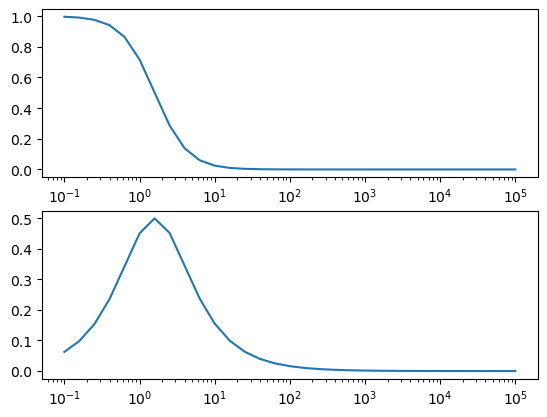

In [67]:

fig ,ax = plt.subplots(2,1)
f = pelton(freq,tau,c)
# f = pelton_dual(freq,tau1,c1, tau2,c2)
ax[0].semilogx(freq,f.real )
ax[1].semilogx(freq,-f.imag)

In [68]:

f_real = f.real
f_imag = f.imag

d= np.r_[f_real,f_imag]
print(d)

[ 9.96067682e-01  9.90180842e-01  9.75696191e-01  9.41115287e-01
  8.64179940e-01  7.16956800e-01  5.02095492e-01  2.86457458e-01
  1.37799744e-01  5.98206298e-02  2.47045230e-02  9.98349713e-03
  3.99852894e-03  1.59568335e-03  6.35863686e-04  2.53238813e-04
  1.00831556e-04  4.01442019e-05  1.59820808e-05  6.36264218e-06
  2.53302317e-06  1.00841623e-06  4.01457974e-07  1.59823337e-07
  6.36268226e-08  2.53302953e-08  1.00841723e-08  4.01458134e-09
  1.59823362e-09  6.36268266e-10  2.53302959e-10 -6.25847783e-02
 -9.86039670e-02 -1.53990695e-01 -2.35408801e-01 -3.42597389e-01
 -4.50477243e-01 -4.99995609e-01 -4.52105721e-01 -3.44689679e-01
 -2.37154216e-01 -1.55223096e-01 -9.94174377e-02 -6.31073744e-02
 -3.99141221e-02 -2.52083193e-02 -1.59114639e-02 -1.00409855e-02
 -6.33581805e-03 -3.99772753e-03 -2.52241981e-03 -1.59154540e-03
 -1.00419879e-03 -6.33606986e-04 -3.99779078e-04 -2.52243570e-04
 -1.59154939e-04 -1.00419979e-04 -6.33607238e-05 -3.99779141e-05
 -2.52243586e-05 -1.59154

In [69]:
#taus =np.logspace(-5,1,11)
taus =np.logspace(-8,4,61)
taus =np.r_[0,np.logspace(-8,4,61)]
# taus =np.logspace(-11,7,91)
n = len(taus)
print(n,taus)


62 [0.00000000e+00 1.00000000e-08 1.58489319e-08 2.51188643e-08
 3.98107171e-08 6.30957344e-08 1.00000000e-07 1.58489319e-07
 2.51188643e-07 3.98107171e-07 6.30957344e-07 1.00000000e-06
 1.58489319e-06 2.51188643e-06 3.98107171e-06 6.30957344e-06
 1.00000000e-05 1.58489319e-05 2.51188643e-05 3.98107171e-05
 6.30957344e-05 1.00000000e-04 1.58489319e-04 2.51188643e-04
 3.98107171e-04 6.30957344e-04 1.00000000e-03 1.58489319e-03
 2.51188643e-03 3.98107171e-03 6.30957344e-03 1.00000000e-02
 1.58489319e-02 2.51188643e-02 3.98107171e-02 6.30957344e-02
 1.00000000e-01 1.58489319e-01 2.51188643e-01 3.98107171e-01
 6.30957344e-01 1.00000000e+00 1.58489319e+00 2.51188643e+00
 3.98107171e+00 6.30957344e+00 1.00000000e+01 1.58489319e+01
 2.51188643e+01 3.98107171e+01 6.30957344e+01 1.00000000e+02
 1.58489319e+02 2.51188643e+02 3.98107171e+02 6.30957344e+02
 1.00000000e+03 1.58489319e+03 2.51188643e+03 3.98107171e+03
 6.30957344e+03 1.00000000e+04]


In [70]:
A=np.zeros((2*m,n))
for i in range(m):
  iwt = 0 + (1.j * 2. * np.pi * freq[i] * taus)
  A[i,:]= (1/(1+iwt)).real
  A[m+i,:] = (1/(1+iwt)).imag


In [71]:
# A=np.zeros((2*m,n))
# for i in range(m):
#   iwt = 0 + (1.j * 2. * np.pi * freq[i] * taus)**(0.5)
#   A[i,:]= (1/(1+iwt)).real
#   A[m+i,:] = (1/(1+iwt)).imag
# #print(A)

In [72]:
freq.max()

100000.0

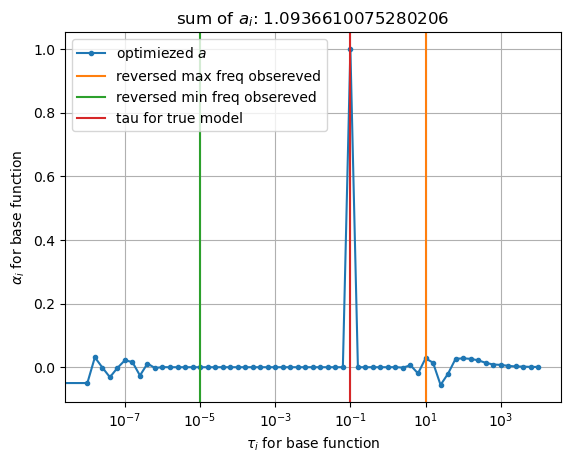

In [73]:
beta =eps # 100000*eps #0.0000000001
a =  np.linalg.solve(A.T@A + beta*np.eye(n), A.T@d)

plt.semilogx(taus,a,".-", label="optimiezed $a$")
# plt.axvline(tau,color="k")
plt.axvline(1/freq.min(), color="C1", label="reversed max freq obsereved")  # Corrected label
plt.axvline(1/freq.max(), color="C2", label="reversed min freq obsereved")  # Corrected label
plt.axvline(tau, color="C3", label="tau for true model")
# plt.axvline(tau1, color="C3", label="tau1 for true model")
# plt.axvline(tau2, color="C4", label="tau2 for true model")  # Corrected label
plt.xlabel("$\\tau_i$ for base function")
plt.ylabel("$\\alpha_i$ for base function")  # Corrected LaTeX for alpha
plt.title(f"sum of $a_i$: {a.sum()}")
plt.legend()
plt.grid()


In [74]:
dpred = A@a
dpred_real = dpred[:m]
dpred_imag = dpred[m:]
print(dpred)

[ 9.96067682e-01  9.90180842e-01  9.75696191e-01  9.41115287e-01
  8.64179940e-01  7.16956800e-01  5.02095492e-01  2.86457458e-01
  1.37799744e-01  5.98206297e-02  2.47045230e-02  9.98349710e-03
  3.99852894e-03  1.59568333e-03  6.35863688e-04  2.53238805e-04
  1.00831558e-04  4.01442010e-05  1.59820818e-05  6.36264795e-06
  2.53302326e-06  1.00842975e-06  4.01454424e-07  1.59845744e-07
  6.36078537e-08  2.53539442e-08  1.00069595e-08  3.98493426e-09
  1.63295454e-09  6.35000736e-10  2.52062045e-10 -6.25847783e-02
 -9.86039670e-02 -1.53990695e-01 -2.35408802e-01 -3.42597389e-01
 -4.50477243e-01 -4.99995609e-01 -4.52105721e-01 -3.44689679e-01
 -2.37154216e-01 -1.55223096e-01 -9.94174376e-02 -6.31073744e-02
 -3.99141221e-02 -2.52083193e-02 -1.59114639e-02 -1.00409855e-02
 -6.33581804e-03 -3.99772753e-03 -2.52241979e-03 -1.59154540e-03
 -1.00419877e-03 -6.33606982e-04 -3.99779047e-04 -2.52243553e-04
 -1.59154901e-04 -1.00419934e-04 -6.33607910e-05 -3.99779213e-05
 -2.52243483e-05 -1.59154

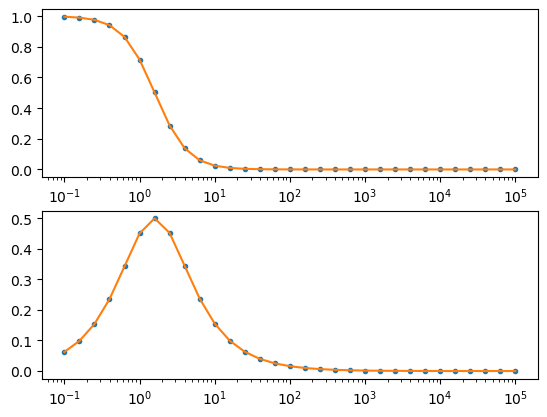

In [75]:

fig ,ax = plt.subplots(2,1)
ax[0].semilogx(freq,f_real,"." )
ax[0].semilogx(freq,dpred_real )
ax[1].semilogx(freq,-f_imag, ".")
ax[1].semilogx(freq,-dpred_imag )


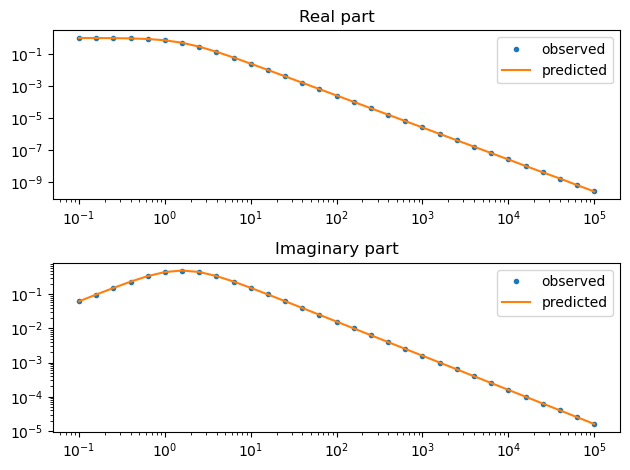

In [76]:
fig ,ax = plt.subplots(2,1)
ax[0].loglog(freq,f_real,"." ,label="observed")
ax[0].loglog(freq,dpred_real , label="predicted")
ax[0].legend()
ax[0].title.set_text("Real part")
ax[1].loglog(freq,-f_imag, ".", label="observed")
ax[1].loglog(freq,-dpred_imag , label="predicted")
ax[1].legend()
ax[1].title.set_text("Imaginary part")
plt.tight_layout()